In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("CSI800_QFL_M_2008-2022.csv")

C:\Users\anshr\AppData\Local\Temp\ipykernel_33620\3735690720.py:1: DtypeWarning: Columns (1,10,14,17,18,1531) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("CSI800_QFL_M_2008-2022.csv")


In [3]:
# Access the individual columns mentioned in the warning message
columns_to_inspect = [1, 10, 14, 17, 18, 1531]

for column_index in columns_to_inspect:
    column_name = data.columns[column_index]  # Get the name of the column
    column_data = data.iloc[:, column_index]  # Access the column data
    
    # Display information about the column
    print(f"Column '{column_name}' (Index: {column_index}):")
    print("Data Type:", column_data.dtype)
    print("Unique Values:", column_data.unique())  # Display unique values
    print("Sample Values:")
    print(column_data.head())  # Display the first few values in the column
    print("\n")


Column 'symbol' (Index: 1):
Data Type: object
Unique Values: ['600016' '600125' '600281' ... 'BRK9WM' 'BTG806' 'BZ125D']
Sample Values:
0    600016
1    600125
2    600281
3    600353
4    600354
Name: symbol, dtype: object


Column 'Security Type' (Index: 10):
Data Type: object
Unique Values: [nan 'SHARE' 'DR']
Sample Values:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Security Type, dtype: object


Column 'State / Province HQ' (Index: 14):
Data Type: object
Unique Values: [nan 'Hubei' 'Guangdong' 'Beijing' 'Jiangsu' 'Shanxi' 'Xinjiang Uygur'
 'Shaanxi' 'Jiangxi' 'Zhejiang' 'Henan' 'Shanghai' 'Fujian'
 'Guangxi Zhuang' 'Sichuan' 'Anhui' 'Inner Mongolia' 'Liaoning' 'Jilin'
 'Hebei' 'Yunnan' 'Qinghai' 'Shandong' 'Hunan' 'Hainan' 'Chongqing'
 'Tianjin' 'Heilongjiang' 'Gansu' 'Guizhou' 'Tibet' 'Ningxia Hui'
 'Central Singapore']
Sample Values:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: State / Province HQ, dtype: object


Column 'Exchange ID' (Index: 17):
Data Type: object


In [3]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index(['date', 'ticker'])

## Choose a subset of data to implement the preprocessing steps.
### All four subsets were then merged to form the final datasets.

In [4]:
subset = data.iloc[:, list(range(1040, 1553)) + [-1]]
subset.head(1)

,,FY2 Debt to Assets,FY3 Debt to Assets,FY4 Debt to Assets,FY5 Debt to Assets,Debt to Assets Change,Debt to Assets Change - 5 Year,Debt to Assets Change - 4 Year,Debt to Assets Change - 3 Year,Debt to Assets Change - 2 Year,Debt to Assets Change - 1 Year,...,Passive Days to Liquidate 3M,Passive Days to Liquidate 6M,Passive Buyer Position 1M,Passive Buyer Position 3M,Passive Buyer Position 6M,Passive Buyer Position 12M,Passive Seller Position 1M,Passive Seller Position 3M,Passive Seller Position 6M,RETURN
date,ticker,,,,,,,,,,,,,,,,,,,,,
2008-01-31,000767-CN,NaN,NaN,NaN,NaN,-5.397624,-5.397624,-4.863332,-7.324266,-3.277081,-1.442903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.162885


In [7]:
subset.index

MultiIndex([('2008-01-31', '000767-CN'),
            ('2008-01-31', '600088-CN'),
            ('2008-01-31', '600058-CN'),
            ('2008-01-31', '000800-CN'),
            ('2008-01-31', '600085-CN'),
            ('2008-01-31', '600089-CN'),
            ('2008-01-31', '000768-CN'),
            ('2008-01-31', '000400-CN'),
            ('2008-01-31', '600096-CN'),
            ('2008-01-31', '600098-CN'),
            ...
            ('2022-12-30', '300482-CN'),
            ('2022-12-30', '603228-CN'),
            ('2022-12-30', '300568-CN'),
            ('2022-12-30', '300741-CN'),
            ('2022-12-30', '300677-CN'),
            ('2022-12-30', '600909-CN'),
            ('2022-12-30', '002920-CN'),
            ('2022-12-30', '002812-CN'),
            ('2022-12-30', '002821-CN'),
            ('2022-12-30', '603858-CN')],
           names=['date', 'ticker'], length=122998)

# Unique Symbols & Dates

In [6]:
unique_symbols = subset.index.get_level_values('symbol').unique()
unique_symbols

Index(['600016', '600125', '600281', '600353', '600354', '600397', '600401',
       '600768', '601136', '601281',
       ...
       'BMXKRH', 'BMXT0H', 'BMYZCF', 'BN4574', 'BNW0W5', 'BNYBG2', 'BQZF2S',
       'BRK9WM', 'BTG806', 'BZ125D'],
      dtype='object', name='symbol', length=2313)

In [7]:
# Extract unique dates
unique_dates = subset.index.get_level_values('date').unique()
unique_dates

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-30', '2008-06-30', '2008-07-31', '2008-08-29',
               '2008-09-26', '2008-10-31',
               ...
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-30'],
              dtype='datetime64[ns]', name='date', length=180, freq=None)

### => Monthly data from 2008-01-31 to 2022-12-30

In [7]:
subset.isnull().sum()

FY2 Debt to Assets            117617
FY3 Debt to Assets            118067
FY4 Debt to Assets            122799
FY5 Debt to Assets            122872
Debt to Assets Change           3732
                               ...  
Passive Buyer Position 12M     87050
Passive Seller Position 1M     91681
Passive Seller Position 3M     88648
Passive Seller Position 6M     87831
RETURN                           127
Length: 514, dtype: int64

In [8]:
for col in subset.columns[334:]:
    print(col)

CAPEX Growth
CAPEX Growth - 5 Year
CAPEX Growth - 4 Year
CAPEX Growth - 3 Year
CAPEX Growth - 2 Year
CAPEX Growth - 1 Year
CAPEX Growth - 5 Year Fwd
CAPEX Growth - 4 Year Fwd
CAPEX Growth - 3 Year Fwd
CAPEX Growth - 2 Year Fwd
CAPEX Growth - 1 Year Fwd
Debt Issuance Growth
Debt Issuance Growth - 5 Year
Debt Issuance Growth - 4 Year
Debt Issuance Growth - 3 Year
Debt Issuance Growth - 2 Year
Debt Issuance Growth - 1 Year
Debt Issuance Growth - 5 Year Fwd
Debt Issuance Growth - 4 Year Fwd
Debt Issuance Growth - 3 Year Fwd
Debt Issuance Growth - 2 Year Fwd
Debt Issuance Growth - 1 Year Fwd
Equity Issuance Growth
Equity Issuance Growth - 5 Year
Equity Issuance Growth - 4 Year
Equity Issuance Growth - 3 Year
Equity Issuance Growth - 2 Year
Equity Issuance Growth - 1 Year
Equity Buyback Ratio
EPS Management
EPS Management - 5 Year
EPS Management - 4 Year
EPS Management - 3 Year
EPS Management - 2 Year
EPS Management - 1 Year
Depreciation & Amortization Ratio
Depreciation & Amortization Varia

# Categorization of Features

In [29]:
# Debt to Assets Metrics
debt_to_assets_metrics = [
    "FY2 Debt to Assets", 
    "FY3 Debt to Assets", "FY4 Debt to Assets", "FY5 Debt to Assets",
    "Debt to Assets Change", "Debt to Assets Change - 5 Year", 
    "Debt to Assets Change - 4 Year", "Debt to Assets Change - 3 Year",
    "Debt to Assets Change - 2 Year", "Debt to Assets Change - 1 Year",
    "Debt to Assets Change - 5 Year Fwd", "Debt to Assets Change - 4 Year Fwd",
    "Debt to Assets Change - 3 Year Fwd", "Debt to Assets Change - 2 Year Fwd",
    "Debt to Assets Change - 1 Year Fwd"
]

# Short-term and Long-term Debt to Capital Metrics
st_lt_debt_to_capital_metrics = [
    "ST Debt to Capital", "FY0 ST Debt to Capital", "FY1 ST Debt to Capital",
    "FY2 ST Debt to Capital", "FY3 ST Debt to Capital", "FY4 ST Debt to Capital",
    "FY5 ST Debt to Capital", "ST Debt to Capital Change", 
    "ST Debt to Capital Change - 5 Year", "ST Debt to Capital Change - 4 Year",
    "ST Debt to Capital Change - 3 Year", "ST Debt to Capital Change - 2 Year",
    "ST Debt to Capital Change - 1 Year", "ST Debt to Capital Change - 5 Year Fwd",
    "ST Debt to Capital Change - 4 Year Fwd", "ST Debt to Capital Change - 3 Year Fwd",
    "ST Debt to Capital Change - 2 Year Fwd", "ST Debt to Capital Change - 1 Year Fwd",
    "LT Debt to Capital", "FY0 LT Debt to Capital", "FY1 LT Debt to Capital",
    "FY2 LT Debt to Capital", "FY3 LT Debt to Capital", "FY4 LT Debt to Capital",
    "FY5 LT Debt to Capital", "LT Debt to Capital Change",
    "LT Debt to Capital Change - 5 Year", "LT Debt to Capital Change - 4 Year",
    "LT Debt to Capital Change - 3 Year", "LT Debt to Capital Change - 2 Year",
    "LT Debt to Capital Change - 1 Year", "LT Debt to Capital Change - 5 Year Fwd",
    "LT Debt to Capital Change - 4 Year Fwd", "LT Debt to Capital Change - 3 Year Fwd",
    "LT Debt to Capital Change - 2 Year Fwd", "LT Debt to Capital Change - 1 Year Fwd"
]

# Debt to Capital Metrics
debt_to_capital_metrics = [
    "Debt to Capital", "FY0 Debt to Capital", "FY1 Debt to Capital",
    "FY2 Debt to Capital", "FY3 Debt to Capital", "FY4 Debt to Capital",
    "FY5 Debt to Capital", "Debt to Capital Change", 
    "Debt to Capital Change - 5 Year", "Debt to Capital Change - 4 Year",
    "Debt to Capital Change - 3 Year", "Debt to Capital Change - 2 Year",
    "Debt to Capital Change - 1 Year", "Debt to Capital Change - 5 Year Fwd",
    "Debt to Capital Change - 4 Year Fwd", "Debt to Capital Change - 3 Year Fwd",
    "Debt to Capital Change - 2 Year Fwd", "Debt to Capital Change - 1 Year Fwd"
]

# Debt to Equity Metrics
debt_to_equity_metrics = [
    "ST Debt to Equity", "FY0 ST Debt to Equity", "FY1 ST Debt to Equity",
    "FY2 ST Debt to Equity", "FY3 ST Debt to Equity", "FY4 ST Debt to Equity",
    "FY5 ST Debt to Equity", "ST Debt to Equity Change", 
    "ST Debt to Equity Change - 5 Year", "ST Debt to Equity Change - 4 Year",
    "ST Debt to Equity Change - 3 Year", "ST Debt to Equity Change - 2 Year",
    "ST Debt to Equity Change - 1 Year", "ST Debt to Equity Change - 5 Year Fwd",
    "ST Debt to Equity Change - 4 Year Fwd", "ST Debt to Equity Change - 3 Year Fwd",
    "ST Debt to Equity Change - 2 Year Fwd", "ST Debt to Equity Change - 1 Year Fwd",
    "LT Debt to Equity", "FY0 LT Debt to Equity", "FY1 LT Debt to Equity",
    "FY2 LT Debt to Equity", "FY3 LT Debt to Equity", "FY4 LT Debt to Equity",
    "FY5 LT Debt to Equity", "LT Debt to Equity Change",
    "LT Debt to Equity Change - 5 Year", "LT Debt to Equity Change - 4 Year",
    "LT Debt to Equity Change - 3 Year", "LT Debt to Equity Change - 2 Year",
    "LT Debt to Equity Change - 1 Year", "LT Debt to Equity Change - 5 Year Fwd",
    "LT Debt to Equity Change - 4 Year Fwd", "LT Debt to Equity Change - 3 Year Fwd",
    "LT Debt to Equity Change - 2 Year Fwd", "LT Debt to Equity Change - 1 Year Fwd",
    "Debt to Equity", "FY0 Debt to Equity", "FY1 Debt to Equity",
    "FY2 Debt to Equity", "FY3 Debt to Equity", "FY4 Debt to Equity",
    "FY5 Debt to Equity", "Debt to Equity Change", 
    "Debt to Equity Change - 5 Year", "Debt to Equity Change - 4 Year",
    "Debt to Equity Change - 3 Year", "Debt to Equity Change - 2 Year",
    "Debt to Equity Change - 1 Year", "Debt to Equity Change - 5 Year Fwd",
    "Debt to Equity Change - 4 Year Fwd", "Debt to Equity Change - 3 Year Fwd",
    "Debt to Equity Change - 2 Year Fwd", "Debt to Equity Change - 1 Year Fwd"
]

# Financial Leverage Metrics
financial_leverage_metrics = [
    "Financial Leverage", "FY0 Financial Leverage", "FY1 Financial Leverage",
    "FY2 Financial Leverage", "FY3 Financial Leverage", "FY4 Financial Leverage",
    "FY5 Financial Leverage", "Financial Leverage Change",
    "Financial Leverage Change - 5 Year", "Financial Leverage Change - 4 Year",
    "Financial Leverage Change - 3 Year", "Financial Leverage Change - 2 Year",
     "Financial Leverage Change - 1 Year", 
    "Financial Leverage Change - 5 Year Fwd", "Financial Leverage Change - 4 Year Fwd",
    "Financial Leverage Change - 3 Year Fwd", "Financial Leverage Change - 2 Year Fwd",
    "Financial Leverage Change - 1 Year Fwd"
]

# Interest Coverage and Other Coverage Ratios
interest_and_coverage_ratios = [
    "Interest Coverage Ratio", "FY0 Interest Coverage Ratio", "FY1 Interest Coverage Ratio",
    "FY2 Interest Coverage Ratio", "FY3 Interest Coverage Ratio", "FY4 Interest Coverage Ratio",
    "FY5 Interest Coverage Ratio", "Interest Coverage Ratio Change",
    "Interest Coverage Ratio Change - 5 Year", "Interest Coverage Ratio Change - 4 Year",
    "Interest Coverage Ratio Change - 3 Year", "Interest Coverage Ratio Change - 2 Year",
    "Interest Coverage Ratio Change - 1 Year", "Interest Coverage Ratio Change - 5 Year Fwd",
    "Interest Coverage Ratio Change - 4 Year Fwd", "Interest Coverage Ratio Change - 3 Year Fwd",
    "Interest Coverage Ratio Change - 2 Year Fwd", "Interest Coverage Ratio Change - 1 Year Fwd",
    "Fixed Charge Coverage Ratio", "Dividend Coverage Ratio"
   
    # Add the remaining FCF Liability Coverage Ratio metrics as needed
]



In [30]:
# Continuing from the previous categorization...

# FCF Liability Coverage Ratios
fcf_liability_coverage_ratios = [
     "FCF Liability Coverage Ratio", "FY0 FCF Liability Coverage Ratio", "FY1 FCF Liability Coverage Ratio",
    "FY2 FCF Liability Coverage Ratio",
    "FY3 FCF Liability Coverage Ratio", "FY4 FCF Liability Coverage Ratio",
    "FY5 FCF Liability Coverage Ratio", "FCF Liability Coverage Ratio Change",
    "FCF Liability Coverage Ratio Change - 5 Year",
    "FCF Liability Coverage Ratio Change - 4 Year",
    "FCF Liability Coverage Ratio Change - 3 Year",
    "FCF Liability Coverage Ratio Change - 2 Year",
    "FCF Liability Coverage Ratio Change - 1 Year",
    "FCF Liability Coverage Ratio Change - 5 Year Fwd",
    "FCF Liability Coverage Ratio Change - 4 Year Fwd",
    "FCF Liability Coverage Ratio Change - 3 Year Fwd",
    "FCF Liability Coverage Ratio Change - 2 Year Fwd",
    "FCF Liability Coverage Ratio Change - 1 Year Fwd"
]

# Liability Coverage Ratios
liability_coverage_ratios = [
    "Liability Coverage Ratio", "FY0 Liability Coverage Ratio",
    "FY1 Liability Coverage Ratio", "FY2 Liability Coverage Ratio",
    "FY3 Liability Coverage Ratio", "FY4 Liability Coverage Ratio",
    "FY5 Liability Coverage Ratio", "Liability Coverage Ratio Change",
    "Liability Coverage Ratio Change - 5 Year",
    "Liability Coverage Ratio Change - 4 Year",
    "Liability Coverage Ratio Change - 3 Year",
    "Liability Coverage Ratio Change - 2 Year",
    "Liability Coverage Ratio Change - 1 Year",
    "Liability Coverage Ratio Change - 5 Year Fwd",
    "Liability Coverage Ratio Change - 4 Year Fwd",
    "Liability Coverage Ratio Change - 3 Year Fwd",
    "Liability Coverage Ratio Change - 2 Year Fwd",
    "Liability Coverage Ratio Change - 1 Year Fwd"
]

# FCF Current Liability Coverage Ratios
fcf_current_liability_coverage_ratios = [
    "FCF Current Liability Coverage Ratio",
    "FY0 FCF Current Liability Coverage Ratio",
    "FY1 FCF Current Liability Coverage Ratio",
    "FY2 FCF Current Liability Coverage Ratio",
    "FY3 FCF Current Liability Coverage Ratio",
    "FY4 FCF Current Liability Coverage Ratio",
    "FY5 FCF Current Liability Coverage Ratio",
    "FCF Current Liability Coverage Ratio Change",
    "FCF Current Liability Coverage Ratio Change - 5 Year",
    "FCF Current Liability Coverage Ratio Change - 4 Year",
    "FCF Current Liability Coverage Ratio Change - 3 Year",
    "FCF Current Liability Coverage Ratio Change - 2 Year",
    "FCF Current Liability Coverage Ratio Change - 1 Year",
    "FCF Current Liability Coverage Ratio Change - 5 Year Fwd",
    "FCF Current Liability Coverage Ratio Change - 4 Year Fwd",
    "FCF Current Liability Coverage Ratio Change - 3 Year Fwd",
    "FCF Current Liability Coverage Ratio Change - 2 Year Fwd",
    "FCF Current Liability Coverage Ratio Change - 1 Year Fwd"
]

# Current Liability Coverage Ratios
current_liability_coverage_ratios = [
    "Current Liability Coverage Ratio",
    "FY0 Current Liability Coverage Ratio",
    "FY1 Current Liability Coverage Ratio",
    "FY2 Current Liability Coverage Ratio",
    "FY3 Current Liability Coverage Ratio",
    "FY4 Current Liability Coverage Ratio",
    "FY5 Current Liability Coverage Ratio",
    "Current Liability Coverage Ratio Change",
    "Current Liability Coverage Ratio Change - 5 Year",
    "Current Liability Coverage Ratio Change - 4 Year",
    "Current Liability Coverage Ratio Change - 3 Year",
    "Current Liability Coverage Ratio Change - 2 Year",
    "Current Liability Coverage Ratio Change - 1 Year",
    "Current Liability Coverage Ratio Change - 5 Year Fwd",
    "Current Liability Coverage Ratio Change - 4 Year Fwd",
    "Current Liability Coverage Ratio Change - 3 Year Fwd",
    "Current Liability Coverage Ratio Change - 2 Year Fwd",
    "Current Liability Coverage Ratio Change - 1 Year Fwd"
]

# Cash and Other Coverage Ratios
cash_and_other_coverage_ratios = [
    "Cash Coverage Ratio", "FY0 Cash Coverage Ratio",
    "FY1 Cash Coverage Ratio", "FY2 Cash Coverage Ratio",
    "FY3 Cash Coverage Ratio", "FY4 Cash Coverage Ratio",
    "FY5 Cash Coverage Ratio", "Cash Coverage Ratio Change",
    "Cash Coverage Ratio Change - 5 Year", "Cash Coverage Ratio Change - 4 Year",
    "Cash Coverage Ratio Change - 3 Year", "Cash Coverage Ratio Change - 2 Year",
    "Cash Coverage Ratio Change - 1 Year", "Cash Coverage Ratio Change - 5 Year Fwd",
    "Cash Coverage Ratio Change - 4 Year Fwd", "Cash Coverage Ratio Change - 3 Year Fwd",
    "Cash Coverage Ratio Change - 2 Year Fwd", "Cash Coverage Ratio Change - 1 Year Fwd",
    # Add Debt Service Ratio, Asset Coverage Ratio, CAPEX Coverage Ratio, etc., from your list here
]

# Growth Metrics
growth_metrics = [
    "Asset Growth", "Asset Growth - 5 Year", "Asset Growth - 4 Year",
    "Asset Growth - 3 Year", "Asset Growth - 2 Year", "Asset Growth - 1 Year",
    "Asset Growth - 5 Year Fwd", "Asset Growth - 4 Year Fwd",
    "Asset Growth - 3 Year Fwd", "Asset Growth - 2 Year Fwd",
    "Asset Growth - 1 Year Fwd", "Asset Growth - 2 Year Fwd", "Asset Growth - 1 Year Fwd",
    "CAPEX Growth", "CAPEX Growth - 5 Year", "CAPEX Growth - 4 Year",
    "CAPEX Growth - 3 Year", "CAPEX Growth - 2 Year", "CAPEX Growth - 1 Year",
    "CAPEX Growth - 5 Year Fwd", "CAPEX Growth - 4 Year Fwd",
    "CAPEX Growth - 3 Year Fwd", "CAPEX Growth - 2 Year Fwd", "CAPEX Growth - 1 Year Fwd",
    "Debt Issuance Growth", "Debt Issuance Growth - 5 Year", "Debt Issuance Growth - 4 Year",
    "Debt Issuance Growth - 3 Year", "Debt Issuance Growth - 2 Year", "Debt Issuance Growth - 1 Year",
    "Debt Issuance Growth - 5 Year Fwd", "Debt Issuance Growth - 4 Year Fwd",
    "Debt Issuance Growth - 3 Year Fwd", "Debt Issuance Growth - 2 Year Fwd", "Debt Issuance Growth - 1 Year Fwd",
    "Equity Issuance Growth", "Equity Issuance Growth - 5 Year", "Equity Issuance Growth - 4 Year",
    "Equity Issuance Growth - 3 Year", "Equity Issuance Growth - 2 Year", "Equity Issuance Growth - 1 Year",
    "Equity Buyback Ratio"
    
]

# This organization helps to manage the data more effectively, especially for analysis purposes such as PCA or factor analysis.


In [31]:
# Earnings and Expense Management
earnings_expense_management = [
    "EPS Management", "EPS Management - 5 Year", "EPS Management - 4 Year",
    "EPS Management - 3 Year", "EPS Management - 2 Year", "EPS Management - 1 Year",
    "Depreciation & Amortization Ratio", "Depreciation & Amortization Variability",
    "CAPEX to Depreciation", "NTM CAPEX to Depreciation",
    "FY1 CAPEX to Depreciation", "FY2 CAPEX to Depreciation",
    "Gross Profit to R&D", "FY1 Gross Profit to R&D", "FY2 Gross Profit to R&D",
    "Stock Option Expense % of Operating Income", "Stock Option Expense % of Net Income",
    "Stock Option Expense % of Sales", "Stock Option Expense % of Equity"
]

# Financial Health and Stability Metrics
financial_health_stability = [
    "Accruals Ratio - Balance Sheet Method", "Accruals Ratio - Cash Flow Method",
    "Cash Generating Power Ratio", "External Financing Dependence Ratio",
    "External Financing Ratio", "Cash Earnings Ratio", "Cash Earnings Ratio Variability",
    "Dividend Variability", "Accumulated Depreciation to Total Fixed Assets",
    "Asset Remaining Useful Life", "Change in Deferred Revenue to Sales",
    "Change in Net Accounts Receivable to Sales", "Change in Deferred Tax Assets to Sales",
    "Change in Prepaid Expense to Sales", "Change in Intangible Assets to Sales",
    "Cash Revenue to Sales", "Accounts Receivable to Sales", "Deferred Tax Assets to Sales",
    "Prepaid Expense to Sales", "Intangible Assets to Sales", "Prepaid Expense to Inventory",
    "Prepaid Expense to Inventory YoY Change", "Finished Goods to Inventory",
    "Finished Goods to Inventory YoY Change", "Bad Debt to Gross Receivables",
    "Bad Debt to Gross Receivables YoY Change", "Minority Interest to Total Equity",
    "Minority Interest to Total Equity YoY Change", "Revenue Stability", "EBIT Stability",
    "EBITDA Stability", "Operating Cash Flow Stability", "Free Cash Flow Stability",
    "EPS Stability", "Net Income Stability", "Gross Margin Stability", "EBIT Margin Stability",
    "EBITDA Margin Stability", "Operating Cash Flow Margin Stability", "Free Cash Flow Margin Stability",
    "Pretax Margin Stability", "Net Margin Stability"
]

# Score Metrics and Financial Models
score_metrics_financial_models = [
    "F Score - Positive Profitability", "F Score - Improving Profitability",
    "F Score - Positive Cash Flows", "F Score - Accruals", "F Score - Improving Margins",
    "F Score - Improving Turnover", "F Score - Decreasing Leverage", "F Score - Improving Liquidity",
    "F Score - Dilution Check", "Piotroski F Score", "\"M Score - Days Sales in Receivables Index\"",
    "M Score - Gross Margin Index", "M Score - Asset Quality Index", "M Score - Sales Growth Index",
    "M Score - Depreciation Index", "M Score - SG&A Index", "M Score - Leverage Index",
    "M Score - Total Accruals to Total Assets", "Beneish M Score", "Z Score - Working Capital to Assets",
    "Z Score - Retained Earnings to Assets", "Z Score - EBIT to Assets",
    "Z Score - Equity Market Value to Liabilities", "Z Score - Sales to Assets", "Altman Z-Score"
]


In [32]:
# Estimate Revisions and Stability
estimate_revisions_stability = [
    "Sales Estimate Revisions 45D", "Sales Estimate Revisions 75D",
    "Sales Estimate Revisions 100D", "Sales Estimate Revisions 180D",
    "Operating Cash Flow Estimate Revisions 45D", "Operating Cash Flow Estimate Revisions 75D",
    "Operating Cash Flow Estimate Revisions 100D", "Operating Cash Flow Estimate Revisions 180D",
    "Free Cash Flow Estimate Revisions 45D", "Free Cash Flow Estimate Revisions 75D",
    "Free Cash Flow Estimate Revisions 100D", "Free Cash Flow Estimate Revisions 180D",
    "EBIT Estimate Revisions 45D", "EBIT Estimate Revisions 75D",
    "EBIT Estimate Revisions 100D", "EBIT Estimate Revisions 180D",
    "EBITDA Estimate Revisions 45D", "EBITDA Estimate Revisions 75D",
    "EBITDA Estimate Revisions 100D", "EBITDA Estimate Revisions 180D",
    "Earnings Estimate Revisions 45D", "Earnings Estimate Revisions 75D",
    "Earnings Estimate Revisions 100D", "Earnings Estimate Revisions 180D",
    "Price Target Estimate Revisions 45D", "Price Target Estimate Revisions 75D",
    "Price Target Estimate Revisions 100D", "Price Target Estimate Revisions 180D",
    "Sales Estimate Stability", "Operating Cash Flow Estimate Stability",
    "Free Cash Flow Estimate Stability", "EBIT Estimate Stability",
    "EBITDA Estimate Stability",    "Earnings Estimate Stability", "Price Target Estimate Stability",
    "Standardized Analyst Price Target", "Robust Estimate Revisions 45D",
    "Robust Estimate Revisions 75D", "Robust Estimate Revisions 100D",
    "Robust Estimate Revisions 180D", "Robust Estimate Item"
]

# Passive Investment Metrics
passive_investment_metrics = [
    "Passive Total Position", "Passive Market Value", "Passive Number of Holders",
    "Passive Percent Outstanding", "Passive Total Percent of Portfolio", "Passive Concentration",
    "Passive Votes Controlled %", "Passive Equity AUM", "Passive P/E Ratio", "Passive P/B Ratio",
    "Passive Dividend Yield", "Passive Relative Strength", "Passive Beta", "Passive Days to Liquidate 1M",
    "Passive Days to Liquidate 3M", "Passive Days to Liquidate 6M", "Passive Buyer Position 1M",
    "Passive Buyer Position 3M", "Passive Buyer Position 6M", "Passive Buyer Position 12M",
    "Passive Seller Position 1M", "Passive Seller Position 3M", "Passive Seller Position 6M"
]

# Asset and CAPEX Coverage Ratios
asset_capex_coverage_ratios = [
    "CAPEX Coverage Ratio", "Asset Coverage Ratio", "Asset Coverage Ratio Change",
    "Asset Coverage Ratio Change - 1 Year", "Asset Coverage Ratio Change - 2 Year",
    "Asset Coverage Ratio Change - 3 Year", "Asset Coverage Ratio Change - 4 Year",
    "Asset Coverage Ratio Change - 5 Year", "Asset Coverage Ratio Change - 1 Year Fwd",
    "Asset Coverage Ratio Change - 2 Year Fwd", "Asset Coverage Ratio Change - 3 Year Fwd",
    "Asset Coverage Ratio Change - 4 Year Fwd", "Asset Coverage Ratio Change - 5 Year Fwd",
    "FY0 Asset Coverage Ratio", "FY1 Asset Coverage Ratio", "FY2 Asset Coverage Ratio",
    "FY3 Asset Coverage Ratio", "FY4 Asset Coverage Ratio", "FY5 Asset Coverage Ratio",
    "CAPEX Coverage Ratio Change", "CAPEX Coverage Ratio Change - 1 Year",
    "CAPEX Coverage Ratio Change - 2 Year", "CAPEX Coverage Ratio Change - 3 Year",
    "CAPEX Coverage Ratio Change - 4 Year", "CAPEX Coverage Ratio Change - 5 Year",
    "CAPEX Coverage Ratio Change - 1 Year Fwd", "CAPEX Coverage Ratio Change - 2 Year Fwd",
    "CAPEX Coverage Ratio Change - 3 Year Fwd", "CAPEX Coverage Ratio Change - 4 Year Fwd",
    "CAPEX Coverage Ratio Change - 5 Year Fwd", "FY0 CAPEX Coverage Ratio",
    "FY1 CAPEX Coverage Ratio", "FY2 CAPEX Coverage Ratio", "FY3 CAPEX Coverage Ratio",
    "FY4 CAPEX Coverage Ratio", "FY5 CAPEX Coverage Ratio"
]

# Debt Service and Short Term Debt Ratios
debt_service_short_term_debt_ratios = [
    "Debt Service Ratio", "Debt Service Ratio Change", "Debt Service Ratio Change - 1 Year",
    "Debt Service Ratio Change - 2 Year", "Debt Service Ratio Change - 3 Year",
    "Debt Service Ratio Change - 4 Year", "Debt Service Ratio Change - 5 Year",
    "Debt Service Ratio Change - 1 Year Fwd", "Debt Service Ratio Change - 2 Year Fwd",
    "Debt Service Ratio Change - 3 Year Fwd", "Debt Service Ratio Change - 4 Year Fwd",
    "Debt Service Ratio Change - 5 Year Fwd", "FY0 Debt Service Ratio", "FY1 Debt Service Ratio",
    "FY2 Debt Service Ratio", "FY3 Debt Service Ratio", "FY4 Debt Service Ratio",
    "FY5 Debt Service Ratio", "Short Term % of Total Debt", "Short Term % of Total Debt Change",
    "Short Term % of Total Debt Change - 1 Year", "Short Term % of Total Debt Change - 2 Year",
    "Short Term % of Total Debt Change - 3 Year", "Short Term % of Total Debt Change - 4 Year",
    "Short Term % of Total Debt Change - 5 Year", "Short Term % of Total Debt Change - 1 Year Fwd",
    "Short Term % of Total Debt Change - 2 Year Fwd", "Short Term % of Total Debt Change - 3 Year Fwd",
    "Short Term % of Total Debt Change - 4 Year Fwd", "Short Term % of Total Debt Change - 5 Year Fwd",
    "FY0 Short Term % of Total Debt", "FY1 Short Term % of Total Debt", "FY2 Short Term % of Total Debt",
    "FY3 Short Term % of Total Debt", "FY4 Short Term % of Total Debt", "FY5 Short Term % of Total Debt"
]


In [33]:
len(debt_to_assets_metrics) + len(st_lt_debt_to_capital_metrics) + len(debt_to_capital_metrics) + len(debt_to_equity_metrics) + len(financial_leverage_metrics) + len(interest_and_coverage_ratios) +len(fcf_liability_coverage_ratios) + len(liability_coverage_ratios) + len(fcf_current_liability_coverage_ratios) + len(current_liability_coverage_ratios) + len(cash_and_other_coverage_ratios) + len(growth_metrics) +len(earnings_expense_management) + len(financial_health_stability) + len(score_metrics_financial_models) +len(estimate_revisions_stability) +len(passive_investment_metrics)+ len(asset_capex_coverage_ratios) + len(debt_service_short_term_debt_ratios) 

515

In [34]:
# Concatenate all category lists into one
all_category_columns = debt_to_assets_metrics + \
                       st_lt_debt_to_capital_metrics + \
                       debt_to_capital_metrics + \
                       debt_to_equity_metrics + \
                       financial_leverage_metrics + \
                       interest_and_coverage_ratios + \
                       fcf_liability_coverage_ratios + \
                       liability_coverage_ratios + \
                       fcf_current_liability_coverage_ratios + \
                       current_liability_coverage_ratios + \
                       cash_and_other_coverage_ratios + \
                       growth_metrics + \
                       earnings_expense_management + \
                       financial_health_stability + \
                       score_metrics_financial_models + \
                       estimate_revisions_stability + \
                       passive_investment_metrics + \
                       asset_capex_coverage_ratios + \
                       debt_service_short_term_debt_ratios

# Convert to a set for faster operations
all_category_columns_set = set(all_category_columns)
subset_columns_set = set(subset.columns)

# Find columns in categories that are not in the subset
missing_columns = all_category_columns_set - subset_columns_set

# Print missing columns
print(f"Columns in categories but not in the subset: {missing_columns}")

# Additionally, find columns in the subset not covered by the categories
extra_columns_in_subset = subset_columns_set - all_category_columns_set
print(f"Columns in the subset but not in categories: {extra_columns_in_subset}")

Columns in categories but not in the subset: set()
Columns in the subset but not in categories: {'RETURN'}


In [16]:
#subset.describe().to_csv("DescriptiveStats.csv")

    

# Handling Null Values 

#### Drop columns with >70% missing data
#### Replace remainign null values with averages.

In [35]:
# Calculate the sum of null values for each column and sort them
null_values_sum = subset.isnull().sum().sort_values(ascending=False)

# Display the sorted sum of null values
print(null_values_sum)


FY5 Asset Coverage Ratio                          122998
Stock Option Expense % of Equity                  122998
Passive Days to Liquidate 1M                      122998
Passive Days to Liquidate 3M                      122998
Short Term % of Total Debt Change - 5 Year Fwd    122998
                                                   ...  
M Score - SG&A Index                                  21
M Score - Leverage Index                              21
M Score - Total Accruals to Total Assets              21
Beneish M Score                                       21
F Score - Improving Turnover                          21
Length: 514, dtype: int64


In [39]:
# Define a threshold
threshold_drop = len(subset) * 0.70

# Identify columns that exceed the threshold
columns_to_drop = null_values_sum[null_values_sum > threshold_drop].index

print(f"Columns to drop due to high null values: {columns_to_drop}")


Columns to drop due to high null values: Index(['FY5 Asset Coverage Ratio', 'Stock Option Expense % of Equity',
       'Passive Days to Liquidate 1M', 'Passive Days to Liquidate 3M',
       'Short Term % of Total Debt Change - 5 Year Fwd',
       'Passive Days to Liquidate 6M', 'FY5 ST Debt to Capital',
       'FY5 Short Term % of Total Debt',
       'Asset Coverage Ratio Change - 5 Year Fwd',
       'LT Debt to Capital Change - 5 Year Fwd',
       ...
       'Passive Total Percent of Portfolio', 'Passive Equity AUM',
       'Passive P/B Ratio', 'Passive P/E Ratio', 'Passive Number of Holders',
       'Free Cash Flow Estimate Revisions 75D',
       'Free Cash Flow Estimate Revisions 180D',
       'Free Cash Flow Estimate Revisions 100D',
       'Free Cash Flow Estimate Revisions 45D', 'FY3 Cash Coverage Ratio'],
      dtype='object', length=205)


In [40]:
subset_clean = subset.drop(columns=columns_to_drop)
subset_clean.shape
#subset_clean.isnull().sum()

(122998, 309)

In [41]:
from sklearn.impute import SimpleImputer

# Initialize the imputer for mean imputation
imputer = SimpleImputer(strategy='mean')

# Identify columns with null values
columns_with_nulls = subset_clean.columns[subset_clean.isnull().any()].tolist()

# Check if there are columns with nulls before proceeding
if columns_with_nulls:
    # Apply imputation only on columns with null values
    subset_clean[columns_with_nulls] = imputer.fit_transform(subset_clean[columns_with_nulls])
else:
    print("No columns with null values to impute.")

# Verify imputation by checking if there are any null values left
print(subset_clean.isnull().sum().max())  

0


### Update category lists

In [42]:
def update_category_lists(category_lists, columns_to_drop):
    """Update all category lists by removing dropped columns."""
    updated_categories = {}
    for category_name, category_list in category_lists.items():
        # Filter out dropped columns from each category list
        updated_list = [column for column in category_list if column not in columns_to_drop]
        updated_categories[category_name] = updated_list
    return updated_categories

# Combine all category lists into a dictionary for easier processing
category_lists = {
    'debt_to_assets_metrics': debt_to_assets_metrics,
    'st_lt_debt_to_capital_metrics': st_lt_debt_to_capital_metrics,
    'debt_to_capital_metrics': debt_to_capital_metrics,
    'debt_to_equity_metrics' : debt_to_equity_metrics,
    'financial_leverage_metrics' : financial_leverage_metrics,
    'interest_and_coverage_ratios' : interest_and_coverage_ratios,
    'fcf_liability_coverage_ratios' : fcf_liability_coverage_ratios,
    'liability_coverage_ratios' : liability_coverage_ratios,
    'fcf_current_liability_coverage_ratios' : fcf_current_liability_coverage_ratios,
    'current_liability_coverage_ratios' : current_liability_coverage_ratios,
    'cash_and_other_coverage_ratios' : cash_and_other_coverage_ratios,
    'growth_metrics' : growth_metrics,
    'earnings_expense_management' : earnings_expense_management,
    'financial_health_stability' : financial_health_stability,
    'score_metrics_financial_models' : score_metrics_financial_models,
    'estimate_revisions_stability' : estimate_revisions_stability,
    'passive_investment_metrics': passive_investment_metrics,
    'asset_capex_coverage_ratios': asset_capex_coverage_ratios,
    'debt_service_short_term_debt_ratios': debt_service_short_term_debt_ratios
}

# Update category lists
updated_categories = update_category_lists(category_lists, columns_to_drop)

# Example
#print("Updated 'debt_to_assets_metrics':", updated_categories['debt_to_assets_metrics'])


In [49]:
updated_categories = {category_name: category_columns 
                               for category_name, category_columns in updated_categories.items() 
                               if any(col in subset_clean.columns for col in category_columns)}

In [50]:
#updated_categories

# Standardization of Features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = [col for col in subset_clean.columns if col != 'RETURN']  # Exclude the target variable

subset_clean_scaled = scaler.fit_transform(subset_clean[features])

# Convert the scaled array back to a DataFrame
subset_clean_scaled = pd.DataFrame(subset_clean_scaled, columns=features, index=subset_clean.index)


In [22]:
subset_clean_scaled.isnull().sum().max()

0

In [28]:
updated_categories

{'debt_to_assets_metrics': ['Debt to Assets Change',
  'Debt to Assets Change - 5 Year',
  'Debt to Assets Change - 4 Year',
  'Debt to Assets Change - 3 Year',
  'Debt to Assets Change - 2 Year',
  'Debt to Assets Change - 1 Year'],
 'st_lt_debt_to_capital_metrics': ['ST Debt to Capital',
  'ST Debt to Capital Change',
  'ST Debt to Capital Change - 5 Year',
  'ST Debt to Capital Change - 4 Year',
  'ST Debt to Capital Change - 3 Year',
  'ST Debt to Capital Change - 2 Year',
  'ST Debt to Capital Change - 1 Year',
  'LT Debt to Capital',
  'LT Debt to Capital Change',
  'LT Debt to Capital Change - 5 Year',
  'LT Debt to Capital Change - 4 Year',
  'LT Debt to Capital Change - 3 Year',
  'LT Debt to Capital Change - 2 Year',
  'LT Debt to Capital Change - 1 Year'],
 'debt_to_capital_metrics': ['Debt to Capital',
  'Debt to Capital Change',
  'Debt to Capital Change - 5 Year',
  'Debt to Capital Change - 4 Year',
  'Debt to Capital Change - 3 Year',
  'Debt to Capital Change - 2 Year'

# Principal Component Analysis

In [51]:
from sklearn.decomposition import PCA

In [52]:
# Fucntion to Use when numebr of fetaures in a actegory is less than n_components specififed

def apply_pca_with_fallback(data, updated_categories, n_components):
    pca_models = {}
    pca_results = {}
    updated_category_lists = {}

    for category_name, category_columns in updated_categories.items():
        existing_columns = [col for col in category_columns if col in data.columns]

        if existing_columns:
            # Attempt PCA with desired components, fallback if necessary
            actual_n_components = min(n_components, len(existing_columns))

            try:
                pca = PCA(n_components=actual_n_components)
                pca_transformed = pca.fit_transform(data[existing_columns])
                pca_df = pd.DataFrame(pca_transformed, index=data.index, columns=[f"PCA_{i+1}" for i in range(pca.n_components_)])
                
                pca_models[category_name] = pca
                pca_results[category_name] = pca_df

                # Identify influential features
                loadings = np.abs(pca.components_)
                influential_features = []
                for i, component in enumerate(loadings):
                    influential_indices = np.where(component >= 0.5)[0]
                    influential_features.extend([existing_columns[index] for index in influential_indices])

                influential_features = list(set(influential_features))
                updated_category_lists[category_name] = influential_features

            except Exception as e:
                print(f"Error applying PCA to {category_name}: {e}")
        else:
            print(f"No columns to process for category {category_name}.")
    
    return updated_category_lists, pca_models, pca_results


In [26]:
def apply_pca_and_update_categories(data, updated_categories, n_components):
    pca_models = {}  # To store PCA models for each category
    pca_results = {}  # To store PCA results for each category
    updated_category_lists = {}  # To store updated category lists with influential features

    for category_name, category_columns in updated_categories.items():
        existing_columns = [col for col in category_columns if col in data.columns]
        
        if existing_columns:
            try:
                # Apply PCA with the specified number of components
                pca = PCA(n_components=n_components)
                pca_transformed = pca.fit_transform(data[existing_columns])
                
                # Convert PCA results to DataFrame
                pca_df = pd.DataFrame(pca_transformed, index=data.index, columns=[f"PCA_{i+1}" for i in range(pca.n_components_)])
                pca_models[category_name] = pca
                pca_results[category_name] = pca_df
                
                # Identify influential features based on loadings
                loadings = np.abs(pca.components_)
                influential_features = []
                for i, component in enumerate(loadings):
                    influential_indices = np.where(component >= 0.5)[0]  # Threshold of 0.5 for influential features
                    influential_features.extend([existing_columns[index] for index in influential_indices])
                
                influential_features = list(set(influential_features))  # Remove duplicates
                updated_category_lists[category_name] = influential_features
                
                #print(f"PCA applied to {category_name} with {n_components} components: Influential features identified.")
            except Exception as e:
                print(f"Error applying PCA to {category_name}: {e}")
        else:
            print(f"No columns to process for category {category_name} after update or columns do not exist in DataFrame.")
    
    return updated_category_lists, pca_models, pca_results



In [53]:
# Apply PCA and update categories for 5 components
updated_categories_5, pca_models_5, pca_results_5 = apply_pca_with_fallback(subset_clean_scaled, updated_categories, 5)

# Apply PCA and update categories for 10 components
updated_categories_10, pca_models_10, pca_results_10 = apply_pca_with_fallback(subset_clean_scaled, updated_categories, 10)

# 

In [54]:
def combine_pca_results(pca_results):
    # Initialize an empty DataFrame to hold combined PCA components
    combined_pca_df = pd.DataFrame(index=subset_clean_scaled.index)  # Ensure it has the same index as your original data
    
    # Iterate through each category's PCA results and concatenate
    for category_name, pca_df in pca_results.items():
        # Rename PCA columns to include the category name for uniqueness
        pca_df_renamed = pca_df.rename(columns=lambda x: f"{category_name}_{x}")
        # Concatenate with the combined_pca_df
        combined_pca_df = pd.concat([combined_pca_df, pca_df_renamed], axis=1)
    
    return combined_pca_df

In [55]:
# Combine PCA results for 5 and 10 components
combined_pca_df_5 = combine_pca_results(pca_results_5)
combined_pca_df_10 = combine_pca_results(pca_results_10)

## Creating next_month_return column 
#### Used for Stock return Prediciton and Backtesting

In [59]:
# First, reset the index if 'symbol' is not already one of the column headers
subset_clean_reset = subset_clean.reset_index()

# Group by 'symbol' and then shift the 'RETURN' column upwards by one
subset_clean_reset['next_month_return'] = subset_clean_reset.groupby('ticker')['RETURN'].shift(-1)

# Set the index back
subset_clean_reset['date'] = pd.to_datetime(subset_clean_reset['date'])
subset_clean_shifted = subset_clean_reset.set_index(['date', 'ticker'])

# Final DataFrames

In [60]:
# Join the returns with PCA results for 5 components
final_df_5_components = combined_pca_df_5.join(subset_clean_shifted[['next_month_return']])

# Join the returns with PCA results for 10 components
final_df_10_components = combined_pca_df_10.join(subset_clean_shifted[['next_month_return']])

In [36]:
#final_df_5_components.to_csv('final_df_5_components(col1040to1553).csv')

In [62]:
final_df_10_components.to_csv('final_df_10_components(col1040to1553).csv')

### Sample~ Getting IC Scores for each Dataset
- Here, Raw Data = Original Features after data-preprocessing
- pca5 = Data with combined PCA factors for each category (using 5 components)
- pca10 = Data with combined PCA factors for each category (using 10 components)

In [40]:
import os
import copy
import math
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.covariance import LedoitWolf

In [41]:
import warnings

def cal_ICs(df, factor_list, col_re, startdate=None, enddate=None):
    """
    :param df: time-series dataframe with factors and return
    :param factor_list: factor list in dataframe
    :param col_re: column of reutrn in dataframe
    :param startdate: start date of IC calculation
    :param enddate: end date of IC calculation
    
    :return: time-series dataframe of IC score
    """
    IC_dfs_ = []
    for f in factor_list:
        IC = []
        
        factor = df[[f]].unstack(level=1)
        re_future = df[[col_re]].unstack(level=1)
        
        if startdate==None or enddate==None:

            datelist = re_future.loc[startdate:enddate].index.tolist()
            factor_arr = factor.values
            re_future_arr = re_future.values
            
        else:
            factor = factor.loc[startdate:enddate]
            datelist = re_future.loc[startdate:enddate].index.tolist()

            factor_arr = factor.values
            re_future_arr = re_future.loc[startdate:enddate].values
        
        dt_ind = []
        if factor.shape[0]==len(datelist):
            for dt in range(len(datelist)):
                x = factor_arr[dt]
                re = re_future_arr[dt]
                if np.sum(np.logical_and(~np.isnan(x),~np.isnan(re))) > 200:
                    # Check if either array is constant
                    if np.std(x) == 0 or np.std(re) == 0:
                        print(f"Skipping correlation calculation for date {datelist[dt]} due to constant input.")
                        continue

                    dt_ind.append(dt)
                    ind = np.where(np.logical_and(~np.isnan(x),~np.isnan(re)))[0]
                    x = x[ind]
                    re = re[ind]

                    # Handle the warning explicitly
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore", category=stats.ConstantInputWarning)
                        correlation, _ = stats.spearmanr(x, re, nan_policy='omit')
                        IC.append(correlation)
        IC_df = pd.Series(index=datelist)
        IC_df[np.array(datelist)[dt_ind]] = IC
        IC_df.name = f
        IC_dfs_.append(IC_df)

    IC_dfs = pd.DataFrame(IC_dfs_)
    return IC_dfs.T

In [42]:
## RAW FACTORS 

subset_raw = subset_clean_scaled.copy().join(subset_clean_shifted[['next_month_return']].copy())

subset_raw.head()

Debt to Assets Change  Debt to Assets Change - 5 Year  \
date       symbol                                                          
2008-01-31 600016              -0.007314                       -0.326327   
           600125              -0.007190                       -0.292240   
           600281              -0.001935                        1.150144   
           600353              -0.007633                       -0.414012   
           600354              -0.008252                       -0.583921   

                   Debt to Assets Change - 4 Year  \
date       symbol                                   
2008-01-31 600016                       -0.253626   
           600125                       -0.266878   
           600281                        0.049013   
           600353                       -0.288568   
           600354                       -0.490645   

                   Debt to Assets Change - 3 Year  \
date       symbol                                   
2008-01-31 600016                   -2.250138e-01   
           600125                   -3.015690e-01   
           600281                   -1.589190e-01   
           600353                    2.077426e-17   
           600354                   -3.488001e-01   

                   Debt to Assets Change - 2 Year  \
date       symbol                                   
2008-01-31 600016                   -1.077248e-01   
           600125                   -2.209347e-01   
           600281                   -8.928811e-02   
           600353                   -2.832419e-17   
           600354                   -1.625205e-01   

                   Debt to Assets Change - 1 Year  ST Debt to Capital  \
date       symbol                                                       
2008-01-31 600016                   -2.247825e-02           -0.207540   
           600125                   -2.409101e-02           -0.672490   
           600281                   -2.256119e-02            3.478541   
           600353                   -4.224724e-18           -1.279621   
           600354                   -2.411502e-02           -0.804730   

                   ST Debt to Capital Change  \
date       symbol                              
2008-01-31 600016                  -0.001733   
           600125                  -0.007020   
           600281                  -0.003136   
           600353                  -0.007849   
           600354                  -0.008861   

                   ST Debt to Capital Change - 5 Year  \
date       symbol                                       
2008-01-31 600016                            1.365461   
           600125                           -0.060435   
           600281                            0.987069   
           600353                           -0.283987   
           600354                           -0.556925   

                   ST Debt to Capital Change - 4 Year  ...  \
date       symbol                                      ...   
2008-01-31 600016                            0.849565  ...   
           600125                           -0.095544  ...   
           600281                            0.119705  ...   
           600353                           -0.210950  ...   
           600354                           -0.471471  ...   

                   Passive Relative Strength  Passive Beta  \
date       symbol                                            
2008-01-31 600016              -1.888441e-15  5.164057e-15   
           600125              -1.888441e-15  5.164057e-15   
           600281              -1.888441e-15  5.164057e-15   
           600353              -1.888441e-15  5.164057e-15   
           600354              -1.888441e-15  5.164057e-15   

                   Passive Buyer Position 1M  Passive Buyer Position 3M  \
date       symbol                                                         
2008-01-31 600016              -8.446935e-17                        0.0   
           600125         

In [71]:
factor_list_raw = subset_raw.columns[subset_raw.columns!='next_month_return'].tolist()
IC_raw = cal_ICs(subset_raw, factor_list_raw, 'next_month_return', '2008-01-31', '2022-12-31')

IC_raw.head()

,Debt to Assets Change,Debt to Assets Change - 5 Year,Debt to Assets Change - 4 Year,Debt to Assets Change - 3 Year,Debt to Assets Change - 2 Year,Debt to Assets Change - 1 Year,ST Debt to Capital,ST Debt to Capital Change,ST Debt to Capital Change - 5 Year,ST Debt to Capital Change - 4 Year,...,Passive Dividend Yield,Passive Relative Strength,Passive Beta,Passive Buyer Position 1M,Passive Buyer Position 3M,Passive Buyer Position 6M,Passive Buyer Position 12M,Passive Seller Position 1M,Passive Seller Position 3M,Passive Seller Position 6M
2008-01-31,0.042939,0.046757,-0.001270,-0.028666,-0.069051,-0.095346,0.189446,-0.037399,0.115920,0.078052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-29,0.058259,0.030624,0.050846,0.069944,0.070941,0.052600,-0.032724,0.048046,-0.051938,-0.055554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-31,-0.033026,0.007635,-0.025688,-0.039511,-0.051316,-0.080614,-0.103348,-0.146205,-0.088327,-0.084483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-04-30,-0.059337,-0.020272,-0.070415,-0.015674,-0.015631,-0.049012,-0.096290,-0.090512,-0.070247,-0.091435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-30,-0.078540,-0.076812,-0.082885,0.013609,0.021498,0.091649,-0.117813,-0.077440,-0.094646,-0.099309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
## PCA - 5 COMPONENTS

factor_list_pca5 = final_df_5_components.columns[final_df_5_components.columns!='next_month_return'].tolist()
IC_pca5 = cal_ICs(final_df_5_components, factor_list_pca5, 'next_month_return', '2008-01-31', '2022-12-31')

IC_pca5.head()

,debt_to_assets_metrics_PCA_1,debt_to_assets_metrics_PCA_2,debt_to_assets_metrics_PCA_3,debt_to_assets_metrics_PCA_4,debt_to_assets_metrics_PCA_5,st_lt_debt_to_capital_metrics_PCA_1,st_lt_debt_to_capital_metrics_PCA_2,st_lt_debt_to_capital_metrics_PCA_3,st_lt_debt_to_capital_metrics_PCA_4,st_lt_debt_to_capital_metrics_PCA_5,...,asset_capex_coverage_ratios_PCA_1,asset_capex_coverage_ratios_PCA_2,asset_capex_coverage_ratios_PCA_3,asset_capex_coverage_ratios_PCA_4,asset_capex_coverage_ratios_PCA_5,debt_service_short_term_debt_ratios_PCA_1,debt_service_short_term_debt_ratios_PCA_2,debt_service_short_term_debt_ratios_PCA_3,debt_service_short_term_debt_ratios_PCA_4,debt_service_short_term_debt_ratios_PCA_5
2008-01-31,0.006854,-0.068593,0.081414,-0.049926,0.044810,0.077052,-0.102636,-0.026229,-0.162199,0.123952,...,-0.205627,-0.133242,0.098538,0.127443,0.119021,-0.150171,0.019236,-0.096434,0.119572,0.069510
2008-02-29,0.055757,-0.028556,-0.022982,0.032400,0.028079,0.031530,0.149309,-0.079122,0.065172,0.039878,...,0.017093,0.041894,-0.009407,-0.041754,-0.052876,0.069676,-0.177583,0.164221,-0.132708,-0.087427
2008-03-31,-0.039875,-0.001066,0.017480,0.032845,-0.045583,-0.076341,0.069245,0.073909,0.068066,-0.064537,...,0.064981,0.049186,-0.105076,-0.042318,-0.078280,0.068960,-0.069938,0.071572,-0.096743,-0.073074
2008-04-30,-0.052931,0.016766,-0.010768,-0.008000,0.051847,-0.093437,0.033297,0.023499,0.105103,-0.095912,...,-0.084812,-0.142713,0.086974,0.129364,0.083584,0.017284,-0.085107,0.079250,0.037047,-0.070290
2008-05-30,-0.070319,0.106632,-0.096122,0.141008,-0.012914,-0.063520,0.059707,0.092283,0.112755,-0.145867,...,0.108612,-0.034383,0.057769,0.014741,0.020186,0.053064,0.038421,0.001190,0.024112,-0.025248


In [73]:
## PCA - 10 COMPONENTS

factor_list_pca10 = final_df_10_components.columns[final_df_10_components.columns!='next_month_return'].tolist()
IC_pca10 = cal_ICs(final_df_10_components, factor_list_pca10, 'next_month_return', '2008-01-31', '2022-12-31')

IC_pca10.head()

,st_lt_debt_to_capital_metrics_PCA_1,st_lt_debt_to_capital_metrics_PCA_2,st_lt_debt_to_capital_metrics_PCA_3,st_lt_debt_to_capital_metrics_PCA_4,st_lt_debt_to_capital_metrics_PCA_5,st_lt_debt_to_capital_metrics_PCA_6,st_lt_debt_to_capital_metrics_PCA_7,st_lt_debt_to_capital_metrics_PCA_8,st_lt_debt_to_capital_metrics_PCA_9,st_lt_debt_to_capital_metrics_PCA_10,...,debt_service_short_term_debt_ratios_PCA_1,debt_service_short_term_debt_ratios_PCA_2,debt_service_short_term_debt_ratios_PCA_3,debt_service_short_term_debt_ratios_PCA_4,debt_service_short_term_debt_ratios_PCA_5,debt_service_short_term_debt_ratios_PCA_6,debt_service_short_term_debt_ratios_PCA_7,debt_service_short_term_debt_ratios_PCA_8,debt_service_short_term_debt_ratios_PCA_9,debt_service_short_term_debt_ratios_PCA_10
2008-01-31,0.077052,-0.102636,-0.026229,-0.162199,0.123952,0.149413,-0.062904,-0.132345,-0.031121,-0.000790,...,-0.149974,0.018954,-0.096434,0.119769,0.069707,-0.004985,-0.065826,0.089073,0.102639,-0.075189
2008-02-29,0.031530,0.149309,-0.079122,0.065172,0.039878,-0.131019,0.126578,0.040567,-0.025271,0.074390,...,0.069676,-0.177583,0.164221,-0.132708,-0.087427,0.154020,0.154902,-0.116433,0.011835,-0.033432
2008-03-31,-0.076341,0.069245,0.073909,0.068066,-0.064537,-0.019761,-0.002670,0.096808,-0.036710,0.048744,...,0.068960,-0.069938,0.071572,-0.096743,-0.073074,0.064267,-0.005328,-0.021865,-0.045803,-0.045823
2008-04-30,-0.093437,0.033297,0.023499,0.105103,-0.095912,-0.092303,0.122274,0.056500,0.034465,-0.022468,...,0.017284,-0.085107,0.079250,0.037047,-0.070290,0.089251,-0.026447,-0.080402,-0.041634,0.045343
2008-05-30,-0.063520,0.059707,0.092283,0.112755,-0.145867,-0.006606,-0.059651,0.089627,0.057627,0.108590,...,0.053064,0.038421,0.001190,0.024112,-0.025248,-0.043322,-0.076179,0.044666,-0.013895,-0.038405


# Averaging

In [83]:
## a summary measure of the predictive power of each factor across all dates

avg_ic_raw = IC_raw.mean(axis=0)
avg_ic_PCA5 = IC_pca5.mean(axis=0)
avg_ic_PCA10 = IC_pca10.mean(axis=0)

avg_ic_raw

Debt to Assets Change            -0.004047
Debt to Assets Change - 5 Year   -0.004600
Debt to Assets Change - 4 Year   -0.005953
Debt to Assets Change - 3 Year   -0.003795
Debt to Assets Change - 2 Year   -0.001178
                                    ...   
Passive Buyer Position 6M        -0.009070
Passive Buyer Position 12M       -0.002019
Passive Seller Position 1M       -0.010374
Passive Seller Position 3M       -0.006847
Passive Seller Position 6M        0.004279
Length: 340, dtype: float64

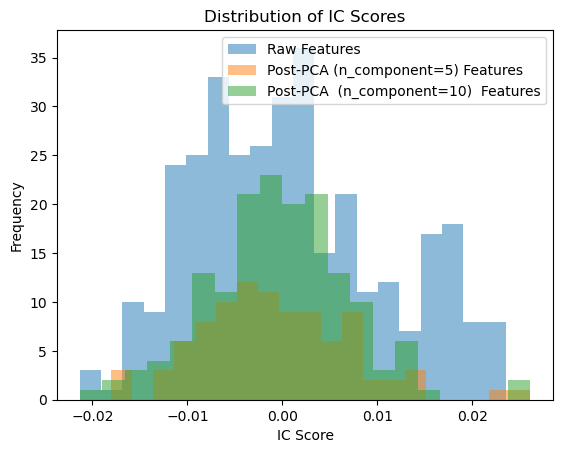

In [84]:
import matplotlib.pyplot as plt

plt.hist(avg_ic_raw, bins=20, alpha=0.5, label='Raw Features')

plt.hist(avg_ic_PCA5, bins=20, alpha=0.5, label='Post-PCA (n_component=5) Features')

plt.hist(avg_ic_PCA10, bins=20, alpha=0.5, label='Post-PCA  (n_component=10)  Features')

plt.xlabel('IC Score')
plt.ylabel('Frequency')
plt.title('Distribution of IC Scores')
plt.legend()
plt.show()